# Agglomerative Clustering

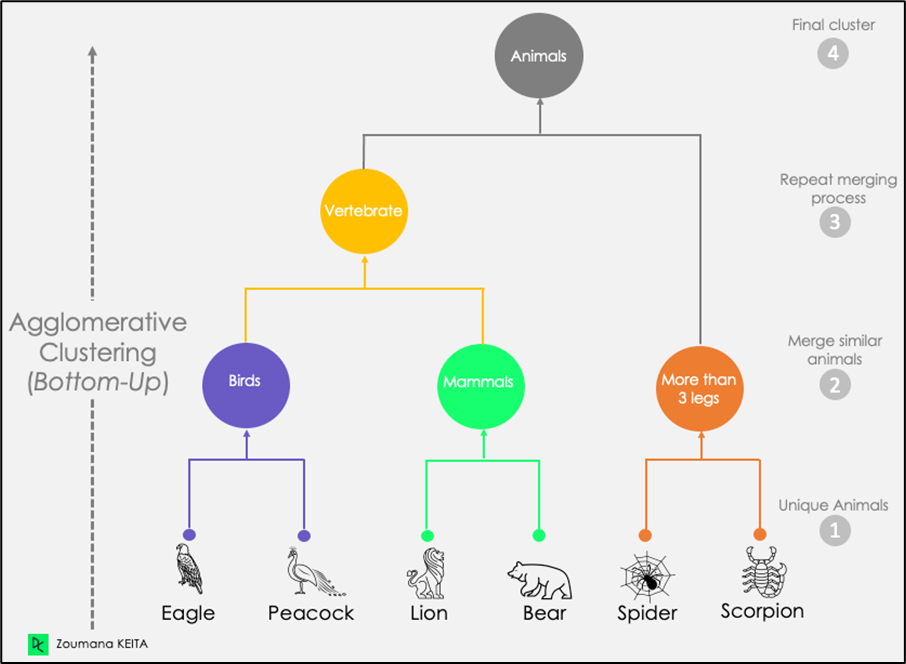

### Install plotly package

In [1]:
%pip install plotly nbformat

### Restart kernel and run all cells

In [2]:
from warnings import filterwarnings 
filterwarnings('ignore')

### Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Here my main goal is to categorize similar customers based Age, Annual income, spending score

### Get the X data

In [7]:
X = df.drop(columns=['CustomerID', 'Gender'])
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Create a preprocessing pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [12]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Determine optimal number of clusters with help of silhoutee score

In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [16]:
n = list(range(2, 15))
n

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [18]:
sil_scores = []
for i in n:
    # Create and fit the model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X_pre)
    # Get the labels out of model
    lb = model.labels_
    # Calculate silhoutee scores
    s = silhouette_score(X_pre, lb)
    sil_scores.append(s)   

In [19]:
sil_scores

[0.31795733680759597,
 0.32148866683112387,
 0.3614512741691407,
 0.39002826186267214,
 0.4201169558789579,
 0.3982948069934959,
 0.36647935858620484,
 0.3753854624760521,
 0.3808885873908944,
 0.38119813515480855,
 0.3535716262087456,
 0.35579016289204674,
 0.35322985543969]

### Plot the silhoutee scores

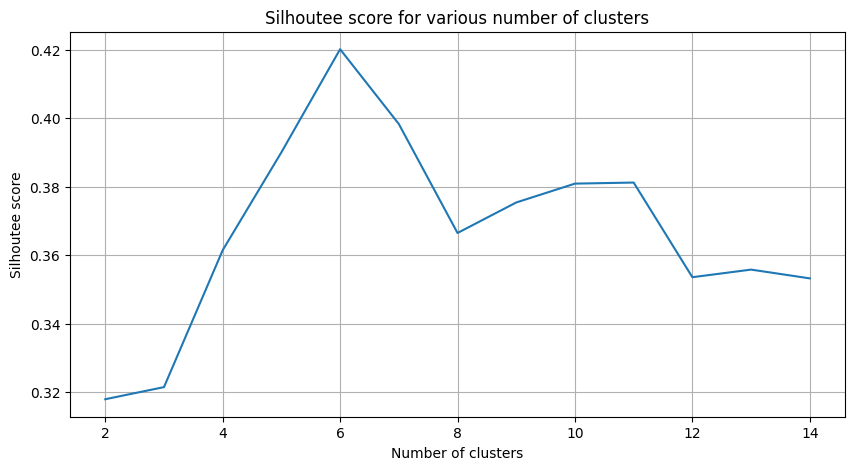

In [21]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.plot(n, sil_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutee score')
plt.title('Silhoutee score for various number of clusters')
plt.grid()
plt.show()

### My highest silhoutee score is at n_clusters = 6 , score is 0.42

### Create an aglomerative model with 6 clusters

In [22]:
best_model = AgglomerativeClustering(n_clusters=6)
best_model.fit(X_pre)

AgglomerativeClustering(n_clusters=6)

In [23]:
lb = best_model.labels_
lb

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

### Save above values in X dataframe

In [24]:
X['Label'] = lb

In [25]:
X

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [27]:
for i in range(6):
    print(f'Cluster number : {i}\n')
    display(X[X['Label']==i])
    print('\n=================================================\n')

Cluster number : 0



,Age,Annual Income (k$),Spending Score (1-100),Label
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0




Cluster number : 1



,Age,Annual Income (k$),Spending Score (1-100),Label
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster number : 2



,Age,Annual Income (k$),Spending Score (1-100),Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster number : 3



,Age,Annual Income (k$),Spending Score (1-100),Label
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3




Cluster number : 4



,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4




Cluster number : 5



,Age,Annual Income (k$),Spending Score (1-100),Label
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


### Cluster centroids

In [28]:
X.groupby(by='Label').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Label,,,
0,27.377778,57.511111,45.844444
1,56.400000,55.288889,48.355556
2,32.692308,86.538462,82.128205
3,43.892857,91.285714,16.678571
4,44.318182,25.772727,20.272727
5,24.809524,25.619048,80.238095


### Visualize the clusters 

In [29]:
import plotly.express as px 
fig = px.scatter_3d(data_frame=X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color='Label')
fig.show()

### Save the results in csv file

In [30]:
X.to_csv('HierarchicalResults.csv', index=False)